# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [15]:
from utils import get_dataset
from waymo_open_dataset import dataset_pb2
from utils import parse_frame

import matplotlib.pyplot as plt
import matplotlib.patches as patches

import numpy as np
%matplotlib inline

In [16]:
PATH='./data/waymo/training_and_validation/*.tfrecord'

In [17]:
dataset = get_dataset(PATH)

INFO:tensorflow:Reading unweighted datasets: ['./data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['./data/waymo/training_and_validation/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 97


In [18]:
dataset

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

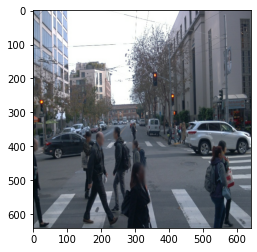

In [5]:
for batch in dataset.shuffle(100).take(1):
    img = batch['image'].numpy()
    plt.imshow(img)

In [6]:
taken=dataset.shuffle(100).take(1)
taken=list(taken.as_numpy_iterator())[0]
taken.keys()

dict_keys(['image', 'source_id', 'key', 'filename', 'groundtruth_image_confidences', 'groundtruth_verified_neg_classes', 'groundtruth_not_exhaustive_classes', 'groundtruth_boxes', 'groundtruth_area', 'groundtruth_is_crowd', 'groundtruth_difficult', 'groundtruth_group_of', 'groundtruth_weights', 'groundtruth_classes', 'groundtruth_image_classes', 'original_image_spatial_shape'])

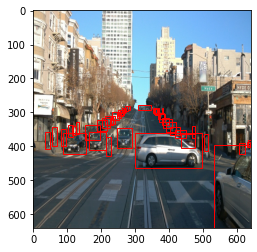

In [7]:
img = taken['image']
annotations = taken['groundtruth_boxes']
annotations.shape
type(annotations)
fig,ax=plt.subplots()
ax.imshow(img)
for bb in annotations:
    xy = (bb[1]*img.shape[1], bb[0]*img.shape[0])
    width = (bb[3]-bb[1])*img.shape[1]
    height = (bb[2]-bb[0])*img.shape[0]
    rect=patches.Rectangle(xy,width,height,edgecolor='r',facecolor='None')
    ax.add_patch(rect)

## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [27]:
def display_instances(batch):
    """
    This function takes a batch from the dataset and display the image with 
    the associated bounding boxes.
    """
    img = batch['image']
    colormap={1: 'r', 2: 'b', 4: 'g'}
    f,ax = plt.subplots()
    ax.imshow(img)
    for bb, label in zip(batch['groundtruth_boxes'], batch['groundtruth_classes']):
        xy = (bb[1]*img.shape[1], bb[0]*img.shape[0])
        width = (bb[3]-bb[1])*img.shape[1]
        height = (bb[2]-bb[0])*img.shape[0]
        rect = patches.Rectangle(xy, width, height,edgecolor=colormap[label],facecolor='None')
        ax.add_patch(rect)
    plt.axis('off')

    # ADD CODE HERE

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

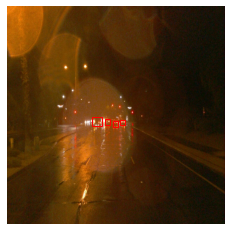

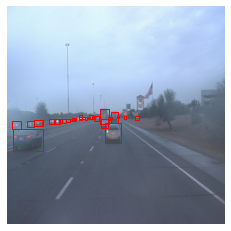

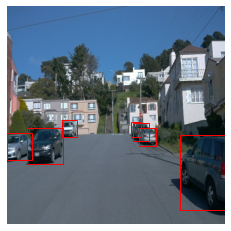

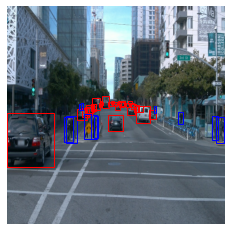

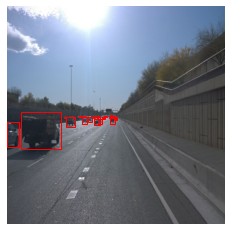

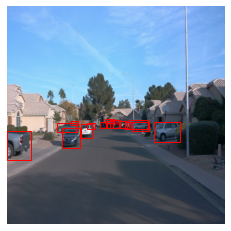

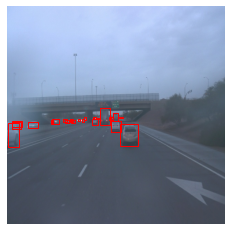

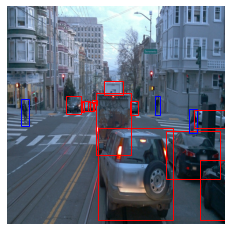

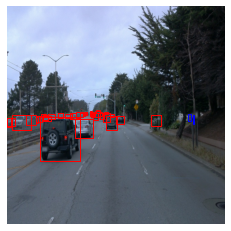

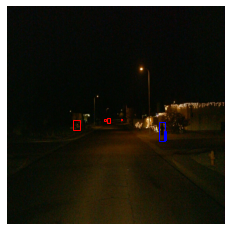

In [28]:
## STUDENT SOLUTION HERE
for i in range(10):
    for batch in list(dataset.shuffle(110, reshuffle_each_iteration=True).take(1).as_numpy_iterator()):
        display_instances(batch)
plt.show()


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [28]:
taken = list(dataset.shuffle(97,reshuffle_each_iteration=True).take(100))
print(type(taken[0]))
print(len(taken))

<class 'dict'>
100


In [78]:
from collections import Counter
label_counter = Counter()
image_height_counter = Counter()
image_width_counter = Counter()
labels = {1: 0, 2: 0, 4: 0}
n_images = 0
n_boxes = 0

In [80]:
for raw_record in dataset.take(1000).as_numpy_iterator():
    n_images += 1
    image_width_counter[raw_record['image'].shape[0]] += 1
    image_height_counter[raw_record['image'].shape[1]] += 1    
    n_boxes += raw_record['groundtruth_boxes'].shape[0]
    for l in raw_record['groundtruth_classes']:
        label_counter[l] += 1
    

In [84]:
print('Number of images: ', n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', len(label_counter.keys()))
print('Max, min, avg height: ', min(image_height_counter),max(image_height_counter), sum(image_height_counter)/len(image_height_counter))
print('Max, min, avg width: ', min(image_width_counter), max(image_width_counter), sum(image_width_counter)/len(image_width_counter))


Number of images:  1001
Number of bounding boxes:  22641
Number of classes:  3
Max, min, avg height:  640 640 640.0
Max, min, avg width:  640 640 640.0


# Distribution of objects across images

In [89]:
record = list(dataset.take(1))[0]
record['source_id']

<tf.Tensor: shape=(), dtype=string, numpy=b'segment-10664823084372323928_4360_000_4380_000_with_camera_labels_90.tfrecord'>